<a href="https://colab.research.google.com/github/cadyngo/EAS-Math-for-AI/blob/main/projections_hands_on_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projections in Machine Learning

## 1. Why Projections Matter in ML
Projections measure how much a vector aligns with a direction. In ML:
- Classification logits = projection onto weight vector.
- Cosine similarity = normalized projection for embeddings.
- PCA = projection onto top variance directions.
- Residuals = information the model ignores.


In [ ]:
import numpy as np
x = np.array([3,2])
u = np.array([1,1])
proj = (x@u/(u@u))*u
x, u, proj

(array([3, 2]), array([1, 1]), array([2.5, 2.5]))

## 2. Projection Formula & Intuition
Projection of x onto u:
$$\text{proj}_u(x)=\frac{x\cdot u}{u\cdot u}u$$
This extracts only the component of x aligned with u.

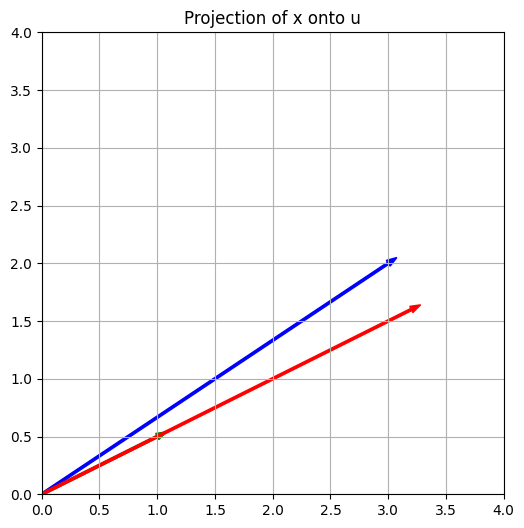

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([3,2]); u=np.array([1,0.5])
proj=(x@u/(u@u))*u

plt.figure(figsize=(6,6))
plt.arrow(0,0,x[0],x[1],width=0.02,color='blue')
plt.arrow(0,0,u[0],u[1],width=0.02,color='green')
plt.arrow(0,0,proj[0],proj[1],width=0.02,color='red')
plt.xlim(0,4); plt.ylim(0,4); plt.gca().set_aspect('equal'); plt.grid(True)
plt.title("Projection of x onto u")
plt.show()


## 3. Projections & Embedding Similarity
Cosine similarity is one of the most widely used methods for comparing high-dimensional vectors (embeddings). Conceptually, it measures how much one vector projects onto another, but normalized so that differences in vector magnitude do not affect similarity.


#### Why It Works for Embeddings:
Embedding spaces are trained so that:
- direction encodes semantic meaning
- magnitude can vary unpredictably

Therefore cosine similarity is the standard metric for:
- sentence embeddings  
- CLIP image–text matching  
- RAG retrieval ranking  
- vector databases (FAISS, Pinecone)  

Cosine similarity measures similarity in meaning, not raw magnitude.

In [ ]:
import numpy as np
w_cat=np.array([1,2,-1,0])
w_dog=np.array([2,4,-2,0])
w_car=np.array([3,-1,0,5])

def cosine(a,b): return a@b/(np.linalg.norm(a)*np.linalg.norm(b))

cosine(w_cat,w_dog), cosine(w_cat,w_car)

(np.float64(1.0000000000000002), np.float64(0.06900655593423542))

## 4. Projection in Linear Regression
Linear regression prediction:
$$\hat y = w^Tx$$
is the scalar projection of x onto w.

In [ ]:
import numpy as np
w=np.array([1,-2,1])
x=np.array([3,1,-1])
logit=w@x
proj=(x@w/(w@w))*w
logit, proj

(np.int64(0), array([ 0., -0.,  0.]))

## 5. Projection + Residual (Orthogonal Decomposition)
We decompose:
$$x = \text{proj}_u(x) + r$$
where r is orthogonal to u.

In [ ]:
import numpy as np
x=np.array([3,2]); u=np.array([1,1])
proj=(x@u/(u@u))*u
res=x-proj
proj, res, np.dot(res,u)

(array([2.5, 2.5]), array([ 0.5, -0.5]), np.float64(0.0))

Visualization:

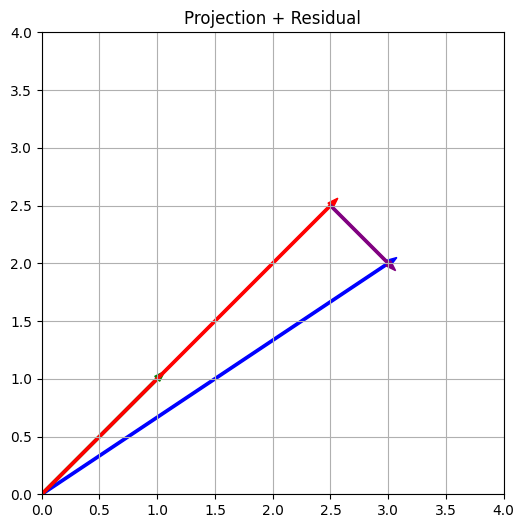

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.arrow(0,0,x[0],x[1],width=0.02,color='blue')
plt.arrow(0,0,u[0],u[1],width=0.02,color='green')
plt.arrow(0,0,proj[0],proj[1],width=0.02,color='red')
plt.arrow(proj[0],proj[1],res[0],res[1],width=0.02,color='purple')
plt.xlim(0,4); plt.ylim(0,4); plt.gca().set_aspect('equal'); plt.grid(True)
plt.title("Projection + Residual")
plt.show()

## 6. Projection onto Subspaces
For subspace U with basis matrix:
$$\text{proj}_U(x)=U(U^TU)^{-1}U^Tx$$

In [ ]:
import numpy as np
U=np.array([[1,0],[1,1],[0,1]],dtype=float)
x=np.array([2,1,3],dtype=float)
proj_U=U@np.linalg.inv(U.T@U)@U.T@x
proj_U

array([0.66666667, 2.33333333, 1.66666667])

## 7. Principal Component Analysis (PCA) as a Projection


PCA can be understood fundamentally as a projection method. It finds a new coordinate system (principal components) that captures the directions of maximum variance in the data, and then projects the data onto the top $k$ components to obtain a lower-dimensional representation.

 Given high-dimensional data, PCA identifies the subspace that:
- preserves the largest amount of variance,  
- minimizes reconstruction error,  
- provides the best rank-$k$ linear approximation of the data.

Formally, PCA solves:

$$
\max_{\|v\| = 1} \ \mathrm{Var}(Xv)
\$$

The top $k$ eigenvectors of the covariance matrix correspond to the directions of greatest variance.



In [ ]:
from sklearn.decomposition import PCA
X=np.random.randn(200,3)
pca=PCA(n_components=1)
X_proj=pca.fit_transform(X)

## 8. Student Exercises

### Exercise 1: Projection onto an orthonormal basis

If the columns of $U $ form an orthonormal basis, then the projection of a vector $x$ onto that subspace is:

$$
\text{proj}(x) = U U^{T} x.
$$

This works because orthonormality implies:
$$
U^{T} U = I.
$$

Write code to project a vector onto an orthonormal basis


In [ ]:
# TODO: Exercise 1

### Exercise 2: Projection onto an affine subspace

An affine subspace has the form:

$$
S = c + \text{span}(U).
$$

To project a vector $ x $ onto $ S $:

$$
\text{proj}_{S}(x)
= c + U (U^{T} U)^{-1} U^{T} (x - c).
$$

Write code to project a vector onto a affine subspace


In [ ]:
# TODO: Exercise 2

### Exercise 3: Projecting Embeddings to Remove Irrelevant Components

Suppose we have an embedding:

$$
x = [3,\; -1,\; 2]
$$

and a direction we want to "remove":

$$
n = [1,\; 1,\; 1].
$$

Interpret $n$ as representing a nuisance semantic direction (e.g., sentiment or background style).

(a) Compute the projection of \(x\) onto \(n\):

$$
\text{proj}_n(x) = \frac{x \cdot n}{\|n\|^2} n
$$

(b) Compute the residual vector:
$$
r = x - \text{proj}_n(x)
$$

(c) Verify that $ r \cdot n = 0 $ (the residual is orthogonal to the removed direction).

(d) Explain how this relates to techniques such as debiasing or removing irrelevant features in embedding spaces.


In [ ]:
# TODO: Exercise 3

### Exercise 4: PCA Intuition on a Small Embedding Dataset

You are given four 2-dimensional "embeddings":

$$
x_1 = [1,\, 2],\quad
x_2 = [2,\, 4],\quad
x_3 = [3,\, 6],\quad
x_4 = [4,\, 8].
$$

(a) Stack these into a matrix \(X\).

(b) Center the data by subtracting the mean.

(c) Compute the covariance matrix:
$$
C = X_c^T X_c
$$

(d) Compute eigenvalues and eigenvectors of the covariance matrix.

(e) Interpret why:
- One eigenvalue is very large  
- The other eigenvalue is (nearly) zero  

(f) Explain why this dataset has rank 1 and lies on a line, and how PCA identifies this.




In [ ]:
# TODO: Exercise 4